#Part-1(BUILDING A BASIC NN)

###ACADEMIC INTEGRITY STATEMENT

"I (We) certify that the code and data in this assignment were generated independently, using only the tools and resources defined in the course and that I (we) did not receive any external help, coaching or contributions during the production of this work."

###Importing various libraries required for the dataset

In [ ]:
import numpy as np 
import pandas as pd
import tensorflow as tf
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

###Uploading the dataset from the github using pd.read_csv()

In [ ]:

data = pd.read_csv("https://raw.githubusercontent.com/CHAbhishek/intro_to_ml/main/income_dataset%20(1).csv")
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053.0,HS-grad,9,Widowed,?,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,66,?,NaN,Some-college,10,Widowed,?,Unmarried,0,4356,40,United-States,<=50K
3,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
4,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K


###Shape of the datatset

In [ ]:
data.shape

(32561, 13)

###In the above we find some missing values denoted with '?'and NAN. so now we are replacing '?' values with the most frequent ones.

In [ ]:
col = list(data)
col

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education.num',
 'marital.status',
 'occupation',
 'relationship',
 'capital.gain',
 'capital.loss',
 'hours.per.week',
 'native.country',
 'income']

In [ ]:
data1 = data.dropna(axis = 0,inplace = False)

In [ ]:
impute = SimpleImputer(missing_values= '?',strategy= 'most_frequent')
data1 = impute.fit_transform(data1)
income = pd.DataFrame(data1)
income.columns = col
income.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053.0,HS-grad,9,Widowed,Prof-specialty,Not-in-family,0,4356,40,United-States,<=50K
1,82,Private,186061.0,HS-grad,9,Widowed,Exec-managerial,Not-in-family,0,4356,18,United-States,<=50K
2,54,Private,140359.0,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,0,3900,40,United-States,<=50K
3,41,Private,264663.0,Some-college,10,Separated,Prof-specialty,Own-child,0,3900,40,United-States,<=50K
4,34,Private,216864.0,HS-grad,9,Divorced,Other-service,Unmarried,0,3770,45,United-States,<=50K


Now we have changed the values of '?' to the most frequent one using the SimpleImputer function.

In [ ]:
income.describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
count,32560,32560,32560.0,32560,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,73,8,21648.0,16,16,7,14,6,119,92,94,41,2
top,36,Private,164190.0,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,0,0,40,United-States,<=50K
freq,898,24531,13.0,10501,10501,14976,5982,13193,29848,31042,15216,29752,24719


###Plotting and visualization of data using histogram plot by taking age and income as variables. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d5852990>,
      dtype=object)

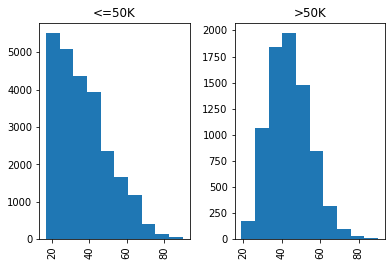

In [ ]:
import matplotlib.pyplot as plt
income.hist(column = 'age', by = 'income')

###visualizing the income vs hours.per.week using the scatterplot

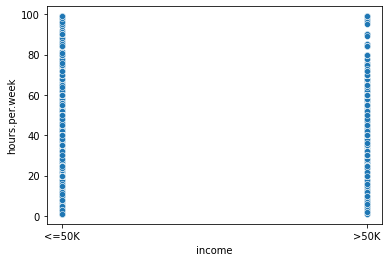

In [ ]:
sns.scatterplot(data=income, x="income", y="hours.per.week", legend=False, sizes=(20, 2000))

# show the graph
plt.show()

###Visualization of histogram plot on basis of education qualification and their income earned

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d5784750>,
      dtype=object)

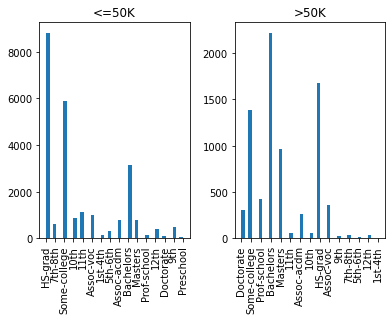

In [ ]:
income.hist(column = 'education', by = 'income',bins = 40,)

###Visualization uisng histogram on age by their marital.status

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f75d50d0a10>,
      dtype=object)

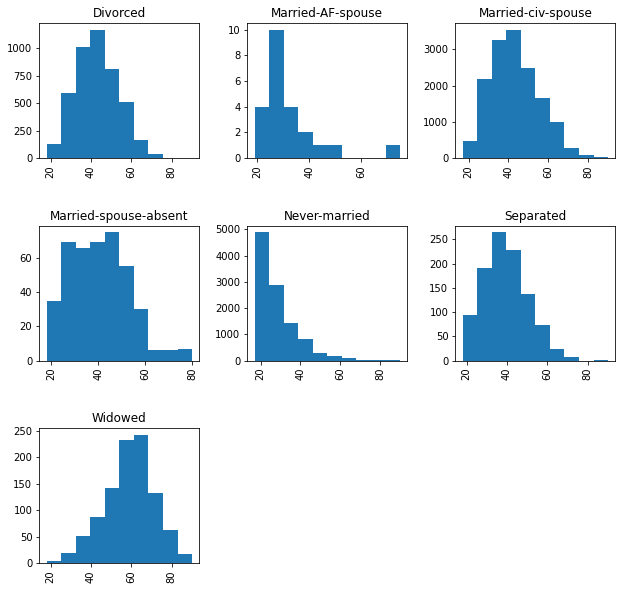

In [ ]:
income.hist(column = 'age', by = 'marital.status',figsize = (10,10))

###Performing Encoding on the feature columns to change the categorical data to the numerical data using label encoder

In [ ]:
from sklearn import preprocessing
cat_g = ['marital.status','income','workclass', 'education', 'occupation','relationship','native.country']
lab_encoder = preprocessing.LabelEncoder()
income[cat_g] = income[cat_g].apply(lab_encoder.fit_transform)
# income = pd.get_dummies(income['workclass'], prefix= 'workclass')
income

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,77053.0,11,9,6,9,1,0,4356,40,38,0
1,82,3,186061.0,11,9,6,3,1,0,4356,18,38,0
2,54,3,140359.0,5,4,0,6,4,0,3900,40,38,0
3,41,3,264663.0,15,10,5,9,3,0,3900,40,38,0
4,34,3,216864.0,11,9,0,7,4,0,3770,45,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,310152.0,15,10,4,10,1,0,0,40,38,0
32556,27,3,257302.0,7,12,2,12,5,0,0,38,38,0
32557,40,3,154374.0,11,9,2,6,0,0,0,40,38,1
32558,58,3,151910.0,11,9,6,0,4,0,0,40,38,0


###To get the dummies for the required columns 

In [ ]:
# income1 = pd.get_dummies(income['workclass'], prefix= 'workclass')

In [ ]:
# Income = pd.concat([income,income1],axis = 1)
# Income.drop('workclass',axis = 1, inplace = True)

###Dropping the column "fnlwgt" since it has negative correlation with the target variable

In [ ]:
income.drop(['fnlwgt'],axis = 1,inplace = True)
income

,age,workclass,education,education.num,marital.status,occupation,relationship,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,11,9,6,9,1,0,4356,40,38,0
1,82,3,11,9,6,3,1,0,4356,18,38,0
2,54,3,5,4,0,6,4,0,3900,40,38,0
3,41,3,15,10,5,9,3,0,3900,40,38,0
4,34,3,11,9,0,7,4,0,3770,45,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32555,22,3,15,10,4,10,1,0,0,40,38,0
32556,27,3,7,12,2,12,5,0,0,38,38,0
32557,40,3,11,9,2,6,0,0,0,40,38,1
32558,58,3,11,9,6,0,4,0,0,40,38,0


Converting categorical values to numerical using OneHotEncoder(Alternative type)

In [ ]:
# from sklearn.preprocessing import OneHotEncoder
# one_hot_enc = OneHotEncoder()
# one_hot_enc.fit_transform(income[['workclass', 'education', 'occupation','relationship','native.country','marital.status','income']])
# one_hot_enc.categories_


# cat_columns = ['workclass', 'education', 'occupation','relationship','native.country','marital.status','income']
# for column in cat_columns:
#     tempo = pd.get_dummies(income[column], prefix=column)
#     income = pd.merge(left=income,right=tempo,left_index=True,right_index=True,)
#     income = income.drop(columns=column)
# print(income)


Normalizing Data

In [ ]:
arr = income.to_numpy()
arr
X = arr[:,0:11]
Y = arr[:,11]

In [ ]:
X.shape

(32560, 11)

In [ ]:
Y.shape

(32560,)

###Using MinMaxScaler performing fit_transform on the X data.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = preprocessing.MinMaxScaler()
X_scale = scaler.fit_transform(X)
X_scale

array([[1.        , 0.42857143, 0.73333333, ..., 1.        , 0.39795918,
        0.95      ],
       [0.89041096, 0.42857143, 0.73333333, ..., 1.        , 0.17346939,
        0.95      ],
       [0.50684932, 0.42857143, 0.33333333, ..., 0.8953168 , 0.39795918,
        0.95      ],
       ...,
       [0.31506849, 0.42857143, 0.73333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.56164384, 0.42857143, 0.73333333, ..., 0.        , 0.39795918,
        0.95      ],
       [0.06849315, 0.42857143, 0.73333333, ..., 0.        , 0.19387755,
        0.95      ]])

converting the array into integer

In [ ]:
X = np.asarray(X).astype(np.int_)
Y = np.array(Y).astype(np.int_)

###Using sklearn.model_Selection import and perform train_test_split on the data

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X, Y, test_size=0.2)
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(26048, 11) (3256, 11) (3256, 11) (26048,) (3256,) (3256,)


###From keras importing the sequential and dense functions

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

###Building an NN layer model

In [ ]:
model = Sequential([
    Dense(30, activation='relu', input_shape=(11,)),
    Dense(30, activation='relu'),
    Dense(20,activation= 'relu'),
    Dense(1, activation='sigmoid'),
])
model

###Compilation of NN model

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

###Training the NN model with epochs as 50




In [ ]:
history = model.fit(X_train, Y_train, batch_size = 40, epochs=50,validation_data=(X_val, Y_val))

Epoch 1/50
652/652 [==============================] - 4s 5ms/step - loss: 1.4792 - accuracy: 0.7778 - val_loss: 0.7033 - val_accuracy: 0.8084
Epoch 2/50
652/652 [==============================] - 3s 4ms/step - loss: 0.6595 - accuracy: 0.8062 - val_loss: 0.6594 - val_accuracy: 0.7939
Epoch 3/50
652/652 [==============================] - 3s 5ms/step - loss: 0.9429 - accuracy: 0.8030 - val_loss: 0.4703 - val_accuracy: 0.8059
Epoch 4/50
652/652 [==============================] - 3s 5ms/step - loss: 0.4803 - accuracy: 0.8119 - val_loss: 0.4251 - val_accuracy: 0.8108
Epoch 5/50
652/652 [==============================] - 3s 4ms/step - loss: 0.5593 - accuracy: 0.8152 - val_loss: 0.4715 - val_accuracy: 0.8136
Epoch 6/50
652/652 [==============================] - 3s 4ms/step - loss: 0.4522 - accuracy: 0.8177 - val_loss: 0.4573 - val_accuracy: 0.8194
Epoch 7/50
652/652 [==============================] - 3s 5ms/step - loss: 0.4429 - accuracy: 0.8200 - val_loss: 0.3889 - val_accuracy: 0.8203
Epoch 

###Evaluation NN Model

In [ ]:
model.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3406 - accuracy: 0.8280


0.828009843826294

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


###Plotting Train and Test Accuracy

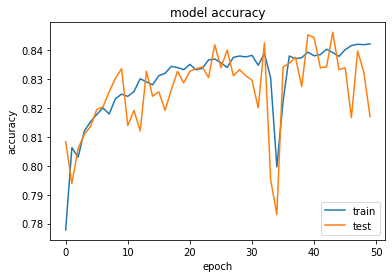

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Plotting Train and Test loss

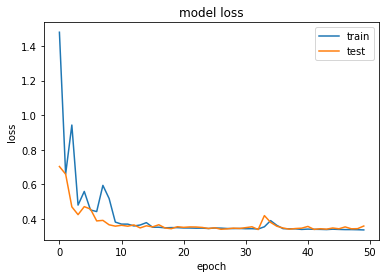

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

#Part-2(OPTIMIZING NN)

###Changing the Dropouts and keeping rest the same

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model2 = Sequential([
    Dense(30, activation = 'selu',kernel_initializer='normal',input_shape=(11,)),
    Dropout(0.2),
    Dense(25, activation='selu',kernel_initializer='normal'),
    Dropout(0.3),
    Dense(20,activation= 'selu',kernel_initializer='normal'),
    Dropout(0.4),
    Dense(1, activation='sigmoid'),
])
model2
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(X_train, Y_train, batch_size =50, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
521/521 [==============================] - 4s 6ms/step - loss: 0.6351 - accuracy: 0.7768 - val_loss: 0.4099 - val_accuracy: 0.8010
Epoch 2/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4512 - accuracy: 0.7967 - val_loss: 0.3969 - val_accuracy: 0.8256
Epoch 3/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4344 - accuracy: 0.8026 - val_loss: 0.3841 - val_accuracy: 0.8299
Epoch 4/100
521/521 [==============================] - 3s 6ms/step - loss: 0.4246 - accuracy: 0.8080 - val_loss: 0.3839 - val_accuracy: 0.8305
Epoch 5/100
521/521 [==============================] - 3s 6ms/step - loss: 0.4146 - accuracy: 0.8145 - val_loss: 0.3756 - val_accuracy: 0.8345
Epoch 6/100
521/521 [==============================] - 5s 9ms/step - loss: 0.4100 - accuracy: 0.8163 - val_loss: 0.3623 - val_accuracy: 0.8354
Epoch 7/100
521/521 [==============================] - 5s 10ms/step - loss: 0.4036 - accuracy: 0.8144 - val_loss: 0.3721 - val_accuracy: 0.826

In [ ]:
model2.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3353 - accuracy: 0.8486


0.8485872149467468

In the above we got an accuracy of 84.85% using Dropout = 0.2 ,0.3,0.4 activation = selu, Initializer = normal and optimizer = adam , activation = selu

###Model Accuracy

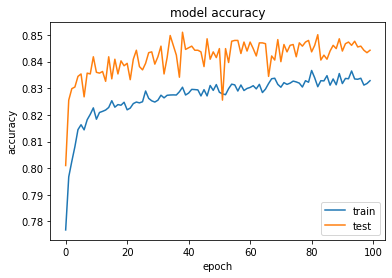

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Training and Test Loss

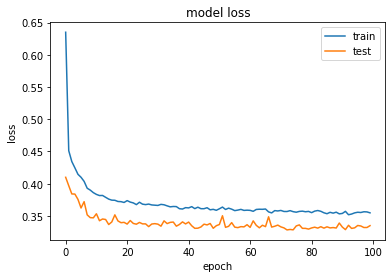

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model8 = Sequential([
    Dense(30, activation = 'selu',kernel_initializer='normal',input_shape=(11,)),
    Dropout(0.4),
    Dense(25, activation='selu',kernel_initializer='normal'),
    Dropout(0.5),
    Dense(20,activation= 'selu',kernel_initializer='normal'),
    Dropout(0.6),
    Dense(1, activation='sigmoid'),
])
model8
model8.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history8 = model8.fit(X_train, Y_train, batch_size =50, epochs=30,validation_data=(X_val, Y_val))

Epoch 1/30
521/521 [==============================] - 7s 11ms/step - loss: 0.6452 - accuracy: 0.7738 - val_loss: 0.4269 - val_accuracy: 0.8025
Epoch 2/30
521/521 [==============================] - 3s 6ms/step - loss: 0.4889 - accuracy: 0.7832 - val_loss: 0.4175 - val_accuracy: 0.8243
Epoch 3/30
521/521 [==============================] - 3s 5ms/step - loss: 0.4593 - accuracy: 0.7913 - val_loss: 0.4092 - val_accuracy: 0.8062
Epoch 4/30
521/521 [==============================] - 3s 6ms/step - loss: 0.4417 - accuracy: 0.8002 - val_loss: 0.3934 - val_accuracy: 0.8228
Epoch 5/30
521/521 [==============================] - 3s 6ms/step - loss: 0.4326 - accuracy: 0.8029 - val_loss: 0.3796 - val_accuracy: 0.8317
Epoch 6/30
521/521 [==============================] - 3s 6ms/step - loss: 0.4285 - accuracy: 0.8070 - val_loss: 0.3978 - val_accuracy: 0.8139
Epoch 7/30
521/521 [==============================] - 3s 5ms/step - loss: 0.4239 - accuracy: 0.8046 - val_loss: 0.3854 - val_accuracy: 0.8280
Epoch

In [ ]:
model8.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 1s 6ms/step - loss: 0.3611 - accuracy: 0.8302


0.8301597237586975

In the above we got an accuracy of 83.01% using Dropout = 0.4 ,0.5,0.6 activation = selu, Initializer = normal and optimizer = adam .

###Model Accuracy

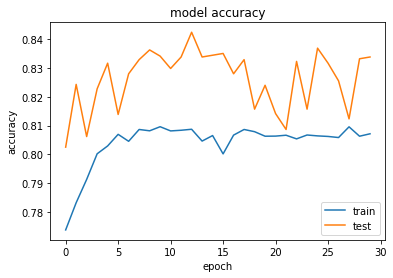

In [ ]:
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Training and Testing Loss

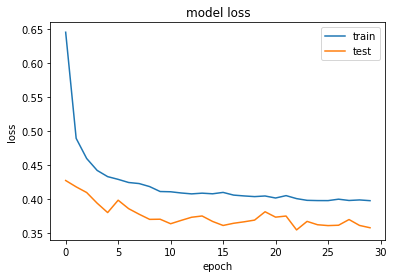

In [ ]:
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
#initializer = tf.keras.initializers.RandomNormal(mean=0., stddev=1.)
model9 = Sequential([
    Dense(30, activation = 'selu',kernel_initializer='normal',input_shape=(11,)),
    Dropout(0.7),
    Dense(25, activation='selu',kernel_initializer='normal'),
    Dropout(0.8),
    Dense(20,activation= 'selu',kernel_initializer='normal'),
    Dropout(0.9),
    Dense(1, activation='sigmoid'),
])
model9
model9.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history9 = model9.fit(X_train, Y_train, batch_size =50, epochs=40,validation_data=(X_val, Y_val))

Epoch 1/40
521/521 [==============================] - 4s 6ms/step - loss: 2.1380 - accuracy: 0.6984 - val_loss: 0.5723 - val_accuracy: 0.7537
Epoch 2/40
521/521 [==============================] - 3s 5ms/step - loss: 0.8046 - accuracy: 0.7581 - val_loss: 0.5397 - val_accuracy: 0.7537
Epoch 3/40
521/521 [==============================] - 5s 9ms/step - loss: 0.6161 - accuracy: 0.7622 - val_loss: 0.5156 - val_accuracy: 0.7537
Epoch 4/40
521/521 [==============================] - 5s 9ms/step - loss: 0.5670 - accuracy: 0.7614 - val_loss: 0.4973 - val_accuracy: 0.7537
Epoch 5/40
521/521 [==============================] - 3s 5ms/step - loss: 0.5468 - accuracy: 0.7641 - val_loss: 0.4828 - val_accuracy: 0.7537
Epoch 6/40
521/521 [==============================] - 3s 5ms/step - loss: 0.5196 - accuracy: 0.7684 - val_loss: 0.4646 - val_accuracy: 0.7718
Epoch 7/40
521/521 [==============================] - 3s 5ms/step - loss: 0.5098 - accuracy: 0.7663 - val_loss: 0.4636 - val_accuracy: 0.7736
Epoch 

In [ ]:
model9.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7712


0.7711916565895081

In the above we got an accuracy of 77.11% using Dropout = 0.7,0.8,0.9 activation = selu, Initializer = normal and optimizer = adam , activation = selu

###Model Accuracy

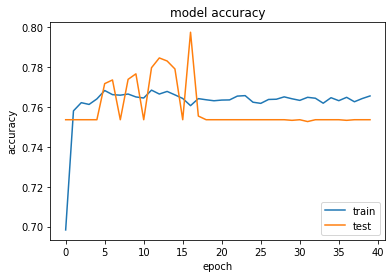

In [ ]:
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

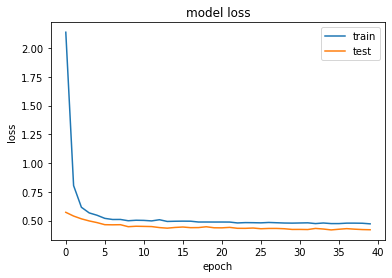

In [ ]:
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###Changing the Activation Function and keeping the remaining same

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model3 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])
model3
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history3 = model3.fit(X_train, Y_train, batch_size =40, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
652/652 [==============================] - 4s 5ms/step - loss: 0.5099 - accuracy: 0.7804 - val_loss: 0.4188 - val_accuracy: 0.7770
Epoch 2/100
652/652 [==============================] - 3s 5ms/step - loss: 0.4200 - accuracy: 0.7841 - val_loss: 0.3988 - val_accuracy: 0.7807
Epoch 3/100
652/652 [==============================] - 3s 5ms/step - loss: 0.4055 - accuracy: 0.7854 - val_loss: 0.3846 - val_accuracy: 0.7826
Epoch 4/100
652/652 [==============================] - 3s 5ms/step - loss: 0.3979 - accuracy: 0.7881 - val_loss: 0.3770 - val_accuracy: 0.7810
Epoch 5/100
652/652 [==============================] - 3s 5ms/step - loss: 0.3908 - accuracy: 0.7966 - val_loss: 0.3794 - val_accuracy: 0.7998
Epoch 6/100
652/652 [==============================] - 3s 5ms/step - loss: 0.3813 - accuracy: 0.8088 - val_loss: 0.3607 - val_accuracy: 0.8231
Epoch 7/100
652/652 [==============================] - 3s 5ms/step - loss: 0.3752 - accuracy: 0.8175 - val_loss: 0.3509 - val_accuracy: 0.8265

In [ ]:
_, train_acc = model3.evaluate(X_train,Y_train, verbose=0) 
_, test_acc = model3.evaluate(X_test,Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.847, Test: 0.843


In the above we got an accuracy of 84% using Dropout = 0.1 , activation = relu, Initializer = random_normal and optimizer = adam

###Model Accuracy

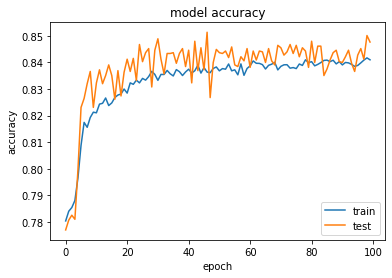

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

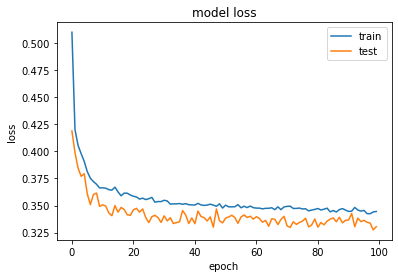

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model10 = Sequential([
    Dense(30, activation = 'selu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='selu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'selu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])
model10
model10.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history10 = model10.fit(X_train, Y_train, batch_size =40, epochs=70,validation_data=(X_val, Y_val))

Epoch 1/70
652/652 [==============================] - 4s 5ms/step - loss: 0.4771 - accuracy: 0.7941 - val_loss: 0.4209 - val_accuracy: 0.8034
Epoch 2/70
652/652 [==============================] - 6s 9ms/step - loss: 0.4166 - accuracy: 0.8088 - val_loss: 0.3881 - val_accuracy: 0.8096
Epoch 3/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4038 - accuracy: 0.8140 - val_loss: 0.3691 - val_accuracy: 0.8391
Epoch 4/70
652/652 [==============================] - 3s 5ms/step - loss: 0.3919 - accuracy: 0.8169 - val_loss: 0.3498 - val_accuracy: 0.8348
Epoch 5/70
652/652 [==============================] - 3s 5ms/step - loss: 0.3823 - accuracy: 0.8217 - val_loss: 0.3559 - val_accuracy: 0.8415
Epoch 6/70
652/652 [==============================] - 3s 5ms/step - loss: 0.3756 - accuracy: 0.8206 - val_loss: 0.3580 - val_accuracy: 0.8372
Epoch 7/70
652/652 [==============================] - 3s 5ms/step - loss: 0.3731 - accuracy: 0.8225 - val_loss: 0.3381 - val_accuracy: 0.8415
Epoch 

In [ ]:
model10.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3367 - accuracy: 0.8458


0.8458231091499329

In the above we got an accuracy of 84.58% using Dropout = 0.1 , activation = selu, Initializer = random_normal and optimizer = adam

###Model Accuracy

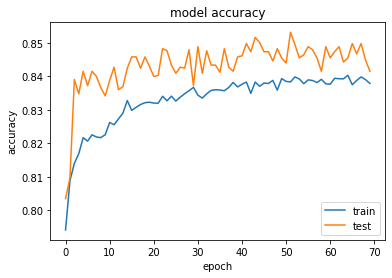

In [ ]:
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

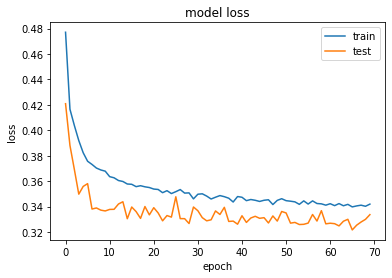

In [ ]:
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model11 = Sequential([
    Dense(30, activation = 'tanh',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='tanh',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'tanh',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])
model11
model11.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history11 = model11.fit(X_train, Y_train, batch_size =40, epochs=70,validation_data=(X_val, Y_val))

Epoch 1/70
652/652 [==============================] - 4s 5ms/step - loss: 0.4583 - accuracy: 0.7774 - val_loss: 0.4292 - val_accuracy: 0.7801
Epoch 2/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4316 - accuracy: 0.7910 - val_loss: 0.4404 - val_accuracy: 0.7773
Epoch 3/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4269 - accuracy: 0.7946 - val_loss: 0.4116 - val_accuracy: 0.8050
Epoch 4/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4209 - accuracy: 0.7959 - val_loss: 0.4012 - val_accuracy: 0.8044
Epoch 5/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4153 - accuracy: 0.7970 - val_loss: 0.4015 - val_accuracy: 0.8050
Epoch 6/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4133 - accuracy: 0.7944 - val_loss: 0.4024 - val_accuracy: 0.8010
Epoch 7/70
652/652 [==============================] - 3s 5ms/step - loss: 0.4124 - accuracy: 0.7946 - val_loss: 0.3993 - val_accuracy: 0.8065
Epoch 

In [ ]:
model11.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8114


0.8114250898361206

In the above we got an accuracy of 81.14% using Dropout = 0.1 , activation = tanh, Initializer = random_normal and optimizer = adam

###Model Accuracy

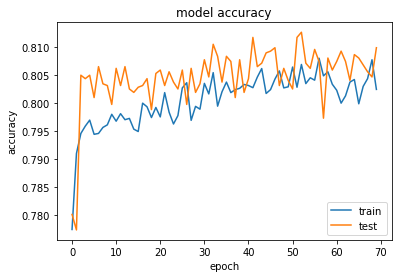

In [ ]:
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

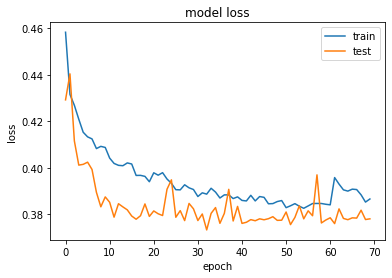

In [ ]:
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###Changing the optimizer and keeping the other functions as same

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model1 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(2, activation='softmax'),
])
model1
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(X_train, Y_train, batch_size =50, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
521/521 [==============================] - 4s 5ms/step - loss: 0.5022 - accuracy: 0.7830 - val_loss: 0.4157 - val_accuracy: 0.7893
Epoch 2/100
521/521 [==============================] - 2s 4ms/step - loss: 0.4195 - accuracy: 0.7899 - val_loss: 0.4026 - val_accuracy: 0.8050
Epoch 3/100
521/521 [==============================] - 2s 5ms/step - loss: 0.4012 - accuracy: 0.7979 - val_loss: 0.3773 - val_accuracy: 0.8274
Epoch 4/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3882 - accuracy: 0.8121 - val_loss: 0.3700 - val_accuracy: 0.8246
Epoch 5/100
521/521 [==============================] - 2s 5ms/step - loss: 0.3813 - accuracy: 0.8166 - val_loss: 0.3586 - val_accuracy: 0.8418
Epoch 6/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3754 - accuracy: 0.8199 - val_loss: 0.3574 - val_accuracy: 0.8222
Epoch 7/100
521/521 [==============================] - 2s 4ms/step - loss: 0.3801 - accuracy: 0.8199 - val_loss: 0.3536 - val_accuracy: 0.8354

In [ ]:
model1.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3455 - accuracy: 0.8351


0.835073709487915

In the above we got an accuracy of 83.50% using Dropout = 0.1 , activation = relu, Initializer = random_normal and optimizer = adam

###Model Accuracy

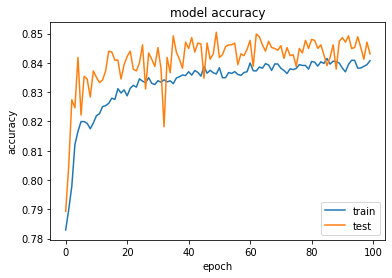

In [ ]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

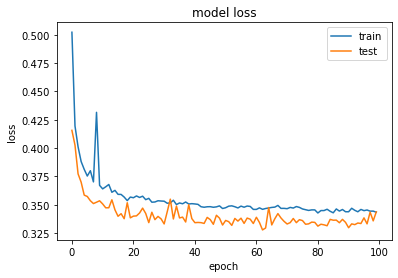

In [ ]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
model12 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(2, activation='softmax'),
])
model12
model12.compile(optimizer='RMSprop',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history12 = model12.fit(X_train, Y_train, batch_size =50, epochs=70,validation_data=(X_val, Y_val))

Epoch 1/70
521/521 [==============================] - 4s 5ms/step - loss: 0.4783 - accuracy: 0.7814 - val_loss: 0.4126 - val_accuracy: 0.7921
Epoch 2/70
521/521 [==============================] - 3s 5ms/step - loss: 0.4181 - accuracy: 0.7986 - val_loss: 0.3890 - val_accuracy: 0.8252
Epoch 3/70
521/521 [==============================] - 3s 5ms/step - loss: 0.4026 - accuracy: 0.8117 - val_loss: 0.3705 - val_accuracy: 0.8314
Epoch 4/70
521/521 [==============================] - 3s 5ms/step - loss: 0.4065 - accuracy: 0.8150 - val_loss: 0.3592 - val_accuracy: 0.8335
Epoch 5/70
521/521 [==============================] - 2s 5ms/step - loss: 0.3977 - accuracy: 0.8197 - val_loss: 0.3524 - val_accuracy: 0.8326
Epoch 6/70
521/521 [==============================] - 3s 5ms/step - loss: 0.3803 - accuracy: 0.8238 - val_loss: 0.3467 - val_accuracy: 0.8378
Epoch 7/70
521/521 [==============================] - 5s 9ms/step - loss: 0.3764 - accuracy: 0.8239 - val_loss: 0.3485 - val_accuracy: 0.8443
Epoch 

In [ ]:
model12.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3371 - accuracy: 0.8421


0.8421375751495361

In the above we got an accuracy of 84.21% using Dropout = 0.1 , activation = relu, Initializer = random_normal and optimizer = RMSprop

###Model Accuracy

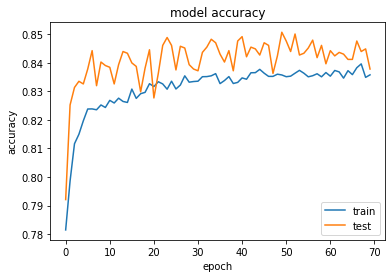

In [ ]:
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

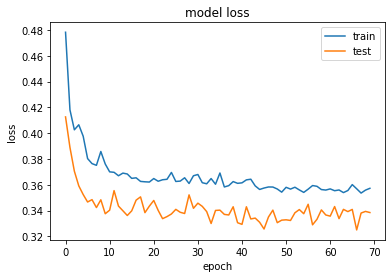

In [ ]:
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
model13 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(2, activation='softmax'),
])
model13
opt = SGD(lr=0.01, momentum=0.7)
model13.compile(optimizer=opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history13 = model13.fit(X_train, Y_train, batch_size =50, epochs=70,validation_data=(X_val, Y_val))

Epoch 1/70


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


521/521 [==============================] - 3s 5ms/step - loss: 0.5927 - accuracy: 0.7560 - val_loss: 0.4557 - val_accuracy: 0.7537
Epoch 2/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4662 - accuracy: 0.7745 - val_loss: 0.4484 - val_accuracy: 0.7727
Epoch 3/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4542 - accuracy: 0.7750 - val_loss: 0.4384 - val_accuracy: 0.7724
Epoch 4/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4481 - accuracy: 0.7763 - val_loss: 0.4319 - val_accuracy: 0.7724
Epoch 5/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4463 - accuracy: 0.7771 - val_loss: 0.4330 - val_accuracy: 0.7712
Epoch 6/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4424 - accuracy: 0.7793 - val_loss: 0.4261 - val_accuracy: 0.7730
Epoch 7/70
521/521 [==============================] - 2s 4ms/step - loss: 0.4402 - accuracy: 0.7806 - val_loss: 0.4384 - val_accuracy: 0.7727
Epoch 8/70
521/52

In [ ]:
model13.evaluate(X_test, Y_test)[1]

102/102 [==============================] - 0s 3ms/step - loss: 0.3787 - accuracy: 0.8090


0.8089680671691895

In the above we got an accuracy of 80.89% using Dropout = 0.1 , activation = relu, Initializer = random_normal and optimizer = SGD

###Model Accuracy

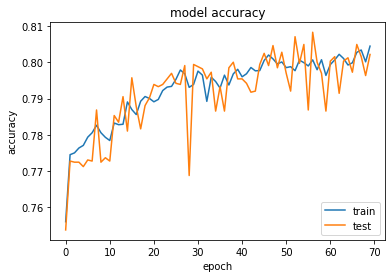

In [ ]:
plt.plot(history13.history['accuracy'])
plt.plot(history13.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

###Model Loss

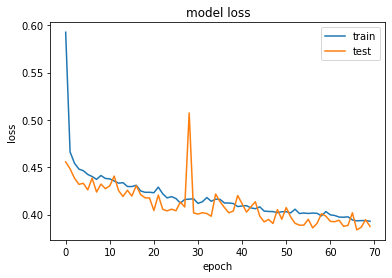

In [ ]:
plt.plot(history13.history['loss'])
plt.plot(history13.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

###Part2(3)

For doing this part,I took the Base Model as Model3 to compare with the improvised Models

Early Stopping

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='auto', verbose=1, patience=300)

In [ ]:
model4 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])
model4
model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history4 = model4.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size= 30,epochs=200, verbose=0, callbacks=[es])

In [ ]:
_, train_acc = model4.evaluate(X_train,Y_train, verbose=0) 
_, test_acc = model4.evaluate(X_test,Y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.845, Test: 0.854


In the above we got accuracy of 85.5% is more than the base model when using early stopping

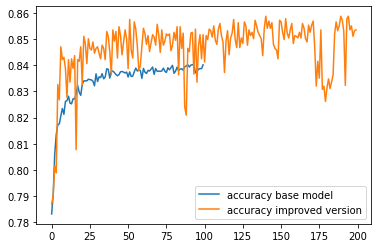

In [ ]:
pyplot.plot(history3.history['accuracy'], label='accuracy base model')
pyplot.plot(history4.history['val_accuracy'], label='accuracy improved version')
pyplot.legend()
pyplot.show()

L1 regularization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

model6 = Sequential([
    Dense(40, activation = 'relu',kernel_regularizer = regularizers.l1(0.000001),kernel_initializer='random_uniform',input_shape=(11,)),
    Dropout(0.2),
    Dense(40, activation='relu',kernel_initializer='random_uniform'),
    Dropout(0.2),
    Dense(25,activation= 'relu',kernel_initializer='random_uniform'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])
model6
model6.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history6 = model6.fit(X_train, Y_train, batch_size =50, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
521/521 [==============================] - 4s 5ms/step - loss: 0.4980 - accuracy: 0.7796 - val_loss: 0.4257 - val_accuracy: 0.7795
Epoch 2/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4252 - accuracy: 0.7902 - val_loss: 0.3955 - val_accuracy: 0.7945
Epoch 3/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4102 - accuracy: 0.7963 - val_loss: 0.3886 - val_accuracy: 0.7890
Epoch 4/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4010 - accuracy: 0.7960 - val_loss: 0.3794 - val_accuracy: 0.7998
Epoch 5/100
521/521 [==============================] - 3s 5ms/step - loss: 0.3936 - accuracy: 0.7995 - val_loss: 0.3744 - val_accuracy: 0.8001
Epoch 6/100
521/521 [==============================] - 3s 5ms/step - loss: 0.3896 - accuracy: 0.8107 - val_loss: 0.3653 - val_accuracy: 0.8185
Epoch 7/100
521/521 [==============================] - 3s 5ms/step - loss: 0.3935 - accuracy: 0.8110 - val_loss: 0.3601 - val_accuracy: 0.8299

In [ ]:
_, train_acc = model6.evaluate(X_train,Y_train, verbose=0) 
_, test_acc = model6.evaluate(X_test,Y_test, verbose=0)
print(train_acc, test_acc)

0.824900209903717 0.8298525810241699


In the above we got an accuracy of 83% where it got slightly increased when compared to the base model

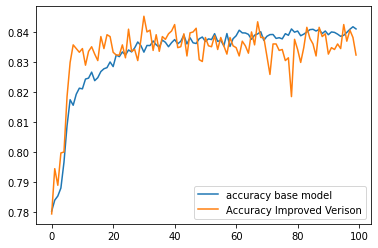

In [ ]:
from matplotlib import pyplot
pyplot.plot(history3.history['accuracy'], label='accuracy base model')
pyplot.plot(history6.history['val_accuracy'], label='Accuracy Improved Verison')
pyplot.legend()
pyplot.show()

L2 regularizer

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

model7 = Sequential([
    Dense(40, activation = 'relu',kernel_regularizer = regularizers.l2(0.000001),kernel_initializer='random_uniform',input_shape=(11,)),
    Dropout(0.2),
    Dense(40, activation='relu',kernel_initializer='random_uniform'),
    Dropout(0.2),
    Dense(25,activation= 'relu',kernel_initializer='random_uniform'),
    Dropout(0.2),
    Dense(1, activation='sigmoid'),
])
model7
model7.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history7 = model7.fit(X_train, Y_train, batch_size =50, epochs=100,validation_data=(X_val, Y_val))

Epoch 1/100
521/521 [==============================] - 5s 7ms/step - loss: 0.4846 - accuracy: 0.7820 - val_loss: 0.4200 - val_accuracy: 0.7948
Epoch 2/100
521/521 [==============================] - 3s 6ms/step - loss: 0.4236 - accuracy: 0.7913 - val_loss: 0.4082 - val_accuracy: 0.7988
Epoch 3/100
521/521 [==============================] - 3s 6ms/step - loss: 0.4159 - accuracy: 0.7908 - val_loss: 0.3855 - val_accuracy: 0.7826
Epoch 4/100
521/521 [==============================] - 3s 5ms/step - loss: 0.4003 - accuracy: 0.8011 - val_loss: 0.3889 - val_accuracy: 0.7970
Epoch 5/100
521/521 [==============================] - 3s 6ms/step - loss: 0.3926 - accuracy: 0.8069 - val_loss: 0.3708 - val_accuracy: 0.8231
Epoch 6/100
521/521 [==============================] - 4s 8ms/step - loss: 0.3930 - accuracy: 0.8113 - val_loss: 0.3686 - val_accuracy: 0.8222
Epoch 7/100
521/521 [==============================] - 5s 10ms/step - loss: 0.3871 - accuracy: 0.8136 - val_loss: 0.3633 - val_accuracy: 0.819

In [ ]:
_, train_acc = model7.evaluate(X_train,Y_train, verbose=0) 
_, test_acc = model7.evaluate(X_test,Y_test, verbose=0)
print(train_acc, test_acc)

0.8391814827919006 0.8390663266181946


In the above we got an accuracy of 84% where the accuracy is slightly decreased when compared to the base model

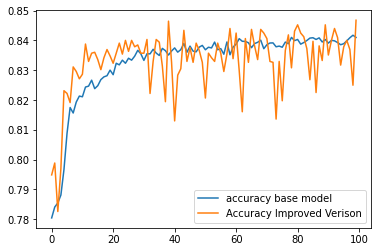

In [ ]:
from matplotlib import pyplot
pyplot.plot(history3.history['accuracy'], label='accuracy base model')
pyplot.plot(history7.history['val_accuracy'], label='Accuracy Improved Verison')
pyplot.legend()
pyplot.show()

KFold

In [ ]:
model14 = Sequential([
    Dense(30, activation = 'relu',kernel_initializer='random_normal',input_shape=(11,)),
    Dropout(0.1),
    Dense(30, activation='relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(20,activation= 'relu',kernel_initializer='random_normal'),
    Dropout(0.1),
    Dense(1, activation='sigmoid'),
])
model14
model14.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import StratifiedKFold
skfold = StratifiedKFold(7)
fold_step  =1

for train,test in skfold.split(X,Y):
  
  print(fold_step)

  X_train,X_test = X[train],X[test]
  Y_train,Y_test = Y[train], Y[test]

  fold_step +=1
  history14 = model14.fit(X_train, Y_train, batch_size =30, epochs=10,validation_data=(X_val, Y_val))

1
Epoch 1/10
931/931 [==============================] - 9s 9ms/step - loss: 0.4273 - accuracy: 0.8050 - val_loss: 4.2029 - val_accuracy: 0.7724
Epoch 2/10
931/931 [==============================] - 8s 9ms/step - loss: 0.3753 - accuracy: 0.8248 - val_loss: 5.3050 - val_accuracy: 0.7964
Epoch 3/10
931/931 [==============================] - 8s 9ms/step - loss: 0.3568 - accuracy: 0.8331 - val_loss: 5.7633 - val_accuracy: 0.8037
Epoch 4/10
931/931 [==============================] - 6s 7ms/step - loss: 0.3470 - accuracy: 0.8371 - val_loss: 6.2810 - val_accuracy: 0.8111
Epoch 5/10
931/931 [==============================] - 4s 5ms/step - loss: 0.3416 - accuracy: 0.8360 - val_loss: 5.5941 - val_accuracy: 0.8028
Epoch 6/10
931/931 [==============================] - 4s 5ms/step - loss: 0.3390 - accuracy: 0.8399 - val_loss: 5.8093 - val_accuracy: 0.8068
Epoch 7/10
931/931 [==============================] - 4s 5ms/step - loss: 0.3383 - accuracy: 0.8412 - val_loss: 8.2424 - val_accuracy: 0.8087
Epoc

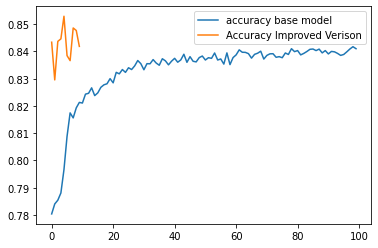

In [ ]:
from matplotlib import pyplot
pyplot.plot(history3.history['accuracy'], label='accuracy base model')
pyplot.plot(history14.history['val_accuracy'], label='Accuracy Improved Verison')
pyplot.legend()
pyplot.show()

Using epoches as 100 for the base model the accuracy is 84% but while I am using epoches as 10 Using KFold we got an Accuracy of 85% and it is stable.

##References:
1.Machine Learning Mastery(https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/)

2.Freecodecamp(https://www.freecodecamp.org/news/how-to-build-your-first-neural-network-to-predict-house-prices-with-keras-f8db83049159/)

3.kaggle(https://www.kaggle.com/code/ritvikkhanna09/simple-neural-networks-using-keras)

4.Keras(https://keras.io/api/optimizers/sgd/)

5.https://machinelearningmastery.com/k-fold-cross-validation/